In [1]:
import re
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils import shuffle

This is code to get a trivial model running.

No train/validation split here, using all data to train the model.

Also make a prediction and verify the exact meaning of the loss, and mean absolute error.

In [3]:
# Load simulated data:
np.random.seed(11)

# Training set should be one concatenated shuffled list of simulated examples
bounds_files = glob.glob("../data/simulData/*_bmBounds.tab")
intensities_files = [re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
                     for bounds_file in bounds_files]
y, x = shuffle(
    np.concatenate([np.loadtxt(bounds_file) for bounds_file in bounds_files]),
    np.concatenate([np.loadtxt(intensities_file) for intensities_file in intensities_files])
)

In [4]:
def overlap_metric(y_true, y_predicted):
    y_pred_round = tf.round(y_predicted)
    max_start = tf.math.maximum(y_true[:, 0], y_pred_round[:, 0])
    min_end = tf.math.minimum(y_true[:, 1], y_pred_round[:,1])
    overlap = tf.math.maximum(0.0, min_end + 1 - max_start)
    longest_bounds = tf.math.maximum(
        y_true[:, 1] + 1 - y_true[:, 0], 
        y_pred_round[:, 1] + 1 - y_pred_round[:, 0]
        )
    return overlap / longest_bounds

In [5]:
model = tf.keras.Sequential([
        layers.Dense(40, activation='relu', input_shape=(40,)),
        layers.Dense(2, activation='linear')
    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    loss='mse', 
    metrics=['mae', overlap_metric]
    )

In [6]:
history = model.fit(x, y, epochs=1000, batch_size=8192, validation_split=0.33)

Train on 60299 samples, validate on 29701 samples
Epoch 1/1000
60299/60299 [==============================] - 1s 14us/step - loss: 3552.4331 - mean_absolute_error: 46.9890 - overlap_metric: 0.0198 - val_loss: 663.7876 - val_mean_absolute_error: 20.4106 - val_overlap_metric: 0.0627
Epoch 2/1000
60299/60299 [==============================] - 0s 1us/step - loss: 840.8891 - mean_absolute_error: 23.6064 - overlap_metric: 0.0418 - val_loss: 253.6926 - val_mean_absolute_error: 12.5569 - val_overlap_metric: 0.0889
Epoch 3/1000
60299/60299 [==============================] - 0s 1us/step - loss: 271.3327 - mean_absolute_error: 13.1544 - overlap_metric: 0.0889 - val_loss: 279.8172 - val_mean_absolute_error: 13.5380 - val_overlap_metric: 0.0829
Epoch 4/1000
60299/60299 [==============================] - 0s 1us/step - loss: 178.3001 - mean_absolute_error: 10.5288 - overlap_metric: 0.1155 - val_loss: 119.5069 - val_mean_absolute_error: 8.4888 - val_overlap_metric: 0.1519
Epoch 5/1000
60299/60299 [===

Epoch 37/1000
60299/60299 [==============================] - 0s 1us/step - loss: 11.4825 - mean_absolute_error: 2.6729 - overlap_metric: 0.4965 - val_loss: 11.2610 - val_mean_absolute_error: 2.6457 - val_overlap_metric: 0.5013
Epoch 38/1000
60299/60299 [==============================] - 0s 1us/step - loss: 11.2413 - mean_absolute_error: 2.6441 - overlap_metric: 0.5007 - val_loss: 11.0313 - val_mean_absolute_error: 2.6183 - val_overlap_metric: 0.5069
Epoch 39/1000
60299/60299 [==============================] - 0s 1us/step - loss: 11.0094 - mean_absolute_error: 2.6158 - overlap_metric: 0.5056 - val_loss: 10.8113 - val_mean_absolute_error: 2.5912 - val_overlap_metric: 0.5104
Epoch 40/1000
60299/60299 [==============================] - 0s 1us/step - loss: 10.7896 - mean_absolute_error: 2.5885 - overlap_metric: 0.5097 - val_loss: 10.6019 - val_mean_absolute_error: 2.5658 - val_overlap_metric: 0.5167
Epoch 41/1000
60299/60299 [==============================] - 0s 1us/step - loss: 10.5805 - m

60299/60299 [==============================] - 0s 1us/step - loss: 7.0580 - mean_absolute_error: 2.0721 - overlap_metric: 0.6072 - val_loss: 7.0216 - val_mean_absolute_error: 2.0690 - val_overlap_metric: 0.6080
Epoch 74/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.0108 - mean_absolute_error: 2.0646 - overlap_metric: 0.6087 - val_loss: 6.9787 - val_mean_absolute_error: 2.0618 - val_overlap_metric: 0.6070
Epoch 75/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.9647 - mean_absolute_error: 2.0573 - overlap_metric: 0.6095 - val_loss: 6.9344 - val_mean_absolute_error: 2.0563 - val_overlap_metric: 0.6148
Epoch 76/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.9211 - mean_absolute_error: 2.0503 - overlap_metric: 0.6121 - val_loss: 6.8924 - val_mean_absolute_error: 2.0482 - val_overlap_metric: 0.6090
Epoch 77/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.8797 - mean_absolute_error: 2.0

60299/60299 [==============================] - 0s 1us/step - loss: 6.0797 - mean_absolute_error: 1.9092 - overlap_metric: 0.6398 - val_loss: 6.0573 - val_mean_absolute_error: 1.9140 - val_overlap_metric: 0.6423
Epoch 110/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.0734 - mean_absolute_error: 1.9079 - overlap_metric: 0.6396 - val_loss: 6.0439 - val_mean_absolute_error: 1.9116 - val_overlap_metric: 0.6426
Epoch 111/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.0599 - mean_absolute_error: 1.9056 - overlap_metric: 0.6399 - val_loss: 6.0417 - val_mean_absolute_error: 1.9116 - val_overlap_metric: 0.6448
Epoch 112/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.0469 - mean_absolute_error: 1.9034 - overlap_metric: 0.6406 - val_loss: 6.0462 - val_mean_absolute_error: 1.9126 - val_overlap_metric: 0.6459
Epoch 113/1000
60299/60299 [==============================] - 0s 1us/step - loss: 6.0375 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.7150 - mean_absolute_error: 1.8462 - overlap_metric: 0.6507 - val_loss: 5.6901 - val_mean_absolute_error: 1.8497 - val_overlap_metric: 0.6502
Epoch 146/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.7049 - mean_absolute_error: 1.8447 - overlap_metric: 0.6506 - val_loss: 5.6889 - val_mean_absolute_error: 1.8494 - val_overlap_metric: 0.6470
Epoch 147/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.7002 - mean_absolute_error: 1.8436 - overlap_metric: 0.6503 - val_loss: 5.6751 - val_mean_absolute_error: 1.8476 - val_overlap_metric: 0.6511
Epoch 148/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.6886 - mean_absolute_error: 1.8418 - overlap_metric: 0.6512 - val_loss: 5.6657 - val_mean_absolute_error: 1.8461 - val_overlap_metric: 0.6518
Epoch 149/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.6833 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.4675 - mean_absolute_error: 1.8045 - overlap_metric: 0.6569 - val_loss: 5.4453 - val_mean_absolute_error: 1.8076 - val_overlap_metric: 0.6545
Epoch 182/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4578 - mean_absolute_error: 1.8025 - overlap_metric: 0.6569 - val_loss: 5.4370 - val_mean_absolute_error: 1.8057 - val_overlap_metric: 0.6582
Epoch 183/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4498 - mean_absolute_error: 1.8015 - overlap_metric: 0.6575 - val_loss: 5.4682 - val_mean_absolute_error: 1.8091 - val_overlap_metric: 0.6490
Epoch 184/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4505 - mean_absolute_error: 1.8017 - overlap_metric: 0.6565 - val_loss: 5.4248 - val_mean_absolute_error: 1.8038 - val_overlap_metric: 0.6577
Epoch 185/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4399 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.2702 - mean_absolute_error: 1.7716 - overlap_metric: 0.6610 - val_loss: 5.2498 - val_mean_absolute_error: 1.7723 - val_overlap_metric: 0.6642
Epoch 218/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2605 - mean_absolute_error: 1.7699 - overlap_metric: 0.6624 - val_loss: 5.2385 - val_mean_absolute_error: 1.7713 - val_overlap_metric: 0.6619
Epoch 219/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2493 - mean_absolute_error: 1.7675 - overlap_metric: 0.6624 - val_loss: 5.2305 - val_mean_absolute_error: 1.7697 - val_overlap_metric: 0.6630
Epoch 220/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2739 - mean_absolute_error: 1.7726 - overlap_metric: 0.6599 - val_loss: 5.3291 - val_mean_absolute_error: 1.7818 - val_overlap_metric: 0.6491
Epoch 221/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2838 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.1480 - mean_absolute_error: 1.7521 - overlap_metric: 0.6624 - val_loss: 5.1546 - val_mean_absolute_error: 1.7532 - val_overlap_metric: 0.6515
Epoch 254/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2722 - mean_absolute_error: 1.7746 - overlap_metric: 0.6528 - val_loss: 5.1088 - val_mean_absolute_error: 1.7460 - val_overlap_metric: 0.6577
Epoch 255/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0942 - mean_absolute_error: 1.7411 - overlap_metric: 0.6647 - val_loss: 5.0985 - val_mean_absolute_error: 1.7446 - val_overlap_metric: 0.6587
Epoch 256/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2818 - mean_absolute_error: 1.7756 - overlap_metric: 0.6530 - val_loss: 5.6568 - val_mean_absolute_error: 1.8522 - val_overlap_metric: 0.6585
Epoch 257/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2964 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.9509 - mean_absolute_error: 1.7166 - overlap_metric: 0.6685 - val_loss: 4.9564 - val_mean_absolute_error: 1.7218 - val_overlap_metric: 0.6752
Epoch 290/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0620 - mean_absolute_error: 1.7378 - overlap_metric: 0.6618 - val_loss: 4.9671 - val_mean_absolute_error: 1.7193 - val_overlap_metric: 0.6612
Epoch 291/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1073 - mean_absolute_error: 1.7460 - overlap_metric: 0.6583 - val_loss: 5.4280 - val_mean_absolute_error: 1.8119 - val_overlap_metric: 0.6644
Epoch 292/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2933 - mean_absolute_error: 1.7792 - overlap_metric: 0.6482 - val_loss: 5.6602 - val_mean_absolute_error: 1.8413 - val_overlap_metric: 0.5911
Epoch 293/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1600 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.8612 - mean_absolute_error: 1.6999 - overlap_metric: 0.6691 - val_loss: 4.7141 - val_mean_absolute_error: 1.6740 - val_overlap_metric: 0.6773
Epoch 326/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7539 - mean_absolute_error: 1.6794 - overlap_metric: 0.6746 - val_loss: 4.9413 - val_mean_absolute_error: 1.7112 - val_overlap_metric: 0.6479
Epoch 327/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8528 - mean_absolute_error: 1.6981 - overlap_metric: 0.6673 - val_loss: 4.8402 - val_mean_absolute_error: 1.7009 - val_overlap_metric: 0.6809
Epoch 328/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7934 - mean_absolute_error: 1.6874 - overlap_metric: 0.6728 - val_loss: 4.7131 - val_mean_absolute_error: 1.6750 - val_overlap_metric: 0.6811
Epoch 329/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7386 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.6496 - mean_absolute_error: 1.6590 - overlap_metric: 0.6774 - val_loss: 4.5824 - val_mean_absolute_error: 1.6467 - val_overlap_metric: 0.6794
Epoch 362/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7378 - mean_absolute_error: 1.6756 - overlap_metric: 0.6709 - val_loss: 4.5782 - val_mean_absolute_error: 1.6471 - val_overlap_metric: 0.6846
Epoch 363/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5961 - mean_absolute_error: 1.6486 - overlap_metric: 0.6807 - val_loss: 4.6312 - val_mean_absolute_error: 1.6594 - val_overlap_metric: 0.6863
Epoch 364/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6910 - mean_absolute_error: 1.6671 - overlap_metric: 0.6740 - val_loss: 4.5813 - val_mean_absolute_error: 1.6453 - val_overlap_metric: 0.6784
Epoch 365/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5800 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.6813 - mean_absolute_error: 1.6640 - overlap_metric: 0.6716 - val_loss: 4.6465 - val_mean_absolute_error: 1.6632 - val_overlap_metric: 0.6866
Epoch 398/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5405 - mean_absolute_error: 1.6374 - overlap_metric: 0.6806 - val_loss: 4.6989 - val_mean_absolute_error: 1.6657 - val_overlap_metric: 0.6528
Epoch 399/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5604 - mean_absolute_error: 1.6408 - overlap_metric: 0.6770 - val_loss: 4.5518 - val_mean_absolute_error: 1.6434 - val_overlap_metric: 0.6890
Epoch 400/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5336 - mean_absolute_error: 1.6363 - overlap_metric: 0.6803 - val_loss: 4.5335 - val_mean_absolute_error: 1.6359 - val_overlap_metric: 0.6708
Epoch 401/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4763 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.5118 - mean_absolute_error: 1.6313 - overlap_metric: 0.6792 - val_loss: 4.4304 - val_mean_absolute_error: 1.6148 - val_overlap_metric: 0.6753
Epoch 434/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.3937 - mean_absolute_error: 1.6074 - overlap_metric: 0.6852 - val_loss: 4.3540 - val_mean_absolute_error: 1.6023 - val_overlap_metric: 0.6869
Epoch 435/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4252 - mean_absolute_error: 1.6133 - overlap_metric: 0.6843 - val_loss: 4.6042 - val_mean_absolute_error: 1.6557 - val_overlap_metric: 0.6873
Epoch 436/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4628 - mean_absolute_error: 1.6215 - overlap_metric: 0.6823 - val_loss: 4.5390 - val_mean_absolute_error: 1.6309 - val_overlap_metric: 0.6675
Epoch 437/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4176 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.2709 - mean_absolute_error: 1.5833 - overlap_metric: 0.6913 - val_loss: 4.3160 - val_mean_absolute_error: 1.5915 - val_overlap_metric: 0.6812
Epoch 470/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.3182 - mean_absolute_error: 1.5925 - overlap_metric: 0.6874 - val_loss: 4.2574 - val_mean_absolute_error: 1.5812 - val_overlap_metric: 0.6925
Epoch 471/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4180 - mean_absolute_error: 1.6115 - overlap_metric: 0.6803 - val_loss: 4.6481 - val_mean_absolute_error: 1.6531 - val_overlap_metric: 0.6471
Epoch 472/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4110 - mean_absolute_error: 1.6110 - overlap_metric: 0.6797 - val_loss: 4.4765 - val_mean_absolute_error: 1.6300 - val_overlap_metric: 0.6915
Epoch 473/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.3682 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.2393 - mean_absolute_error: 1.5761 - overlap_metric: 0.6895 - val_loss: 4.3568 - val_mean_absolute_error: 1.5996 - val_overlap_metric: 0.6661
Epoch 506/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2885 - mean_absolute_error: 1.5868 - overlap_metric: 0.6850 - val_loss: 4.3701 - val_mean_absolute_error: 1.6084 - val_overlap_metric: 0.6941
Epoch 507/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2864 - mean_absolute_error: 1.5844 - overlap_metric: 0.6872 - val_loss: 4.1766 - val_mean_absolute_error: 1.5631 - val_overlap_metric: 0.6900
Epoch 508/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1976 - mean_absolute_error: 1.5672 - overlap_metric: 0.6918 - val_loss: 4.2459 - val_mean_absolute_error: 1.5824 - val_overlap_metric: 0.6978
Epoch 509/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2223 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.0795 - mean_absolute_error: 1.5428 - overlap_metric: 0.6965 - val_loss: 4.2069 - val_mean_absolute_error: 1.5675 - val_overlap_metric: 0.6762
Epoch 542/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1535 - mean_absolute_error: 1.5575 - overlap_metric: 0.6906 - val_loss: 4.2179 - val_mean_absolute_error: 1.5708 - val_overlap_metric: 0.6738
Epoch 543/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0973 - mean_absolute_error: 1.5464 - overlap_metric: 0.6943 - val_loss: 4.0406 - val_mean_absolute_error: 1.5375 - val_overlap_metric: 0.7007
Epoch 544/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0569 - mean_absolute_error: 1.5382 - overlap_metric: 0.6975 - val_loss: 4.1334 - val_mean_absolute_error: 1.5586 - val_overlap_metric: 0.7013
Epoch 545/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1282 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.0071 - mean_absolute_error: 1.5292 - overlap_metric: 0.6956 - val_loss: 3.9655 - val_mean_absolute_error: 1.5247 - val_overlap_metric: 0.7054
Epoch 578/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9274 - mean_absolute_error: 1.5140 - overlap_metric: 0.7017 - val_loss: 3.9596 - val_mean_absolute_error: 1.5235 - val_overlap_metric: 0.7054
Epoch 579/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9764 - mean_absolute_error: 1.5239 - overlap_metric: 0.6983 - val_loss: 3.9440 - val_mean_absolute_error: 1.5168 - val_overlap_metric: 0.6963
Epoch 580/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9188 - mean_absolute_error: 1.5124 - overlap_metric: 0.7010 - val_loss: 3.9070 - val_mean_absolute_error: 1.5111 - val_overlap_metric: 0.7038
Epoch 581/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9297 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.0217 - mean_absolute_error: 1.5334 - overlap_metric: 0.6886 - val_loss: 3.7862 - val_mean_absolute_error: 1.4881 - val_overlap_metric: 0.7074
Epoch 614/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0350 - mean_absolute_error: 1.5375 - overlap_metric: 0.6892 - val_loss: 3.8996 - val_mean_absolute_error: 1.5142 - val_overlap_metric: 0.7078
Epoch 615/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9061 - mean_absolute_error: 1.5100 - overlap_metric: 0.6986 - val_loss: 3.8353 - val_mean_absolute_error: 1.4970 - val_overlap_metric: 0.6953
Epoch 616/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8172 - mean_absolute_error: 1.4919 - overlap_metric: 0.7022 - val_loss: 3.7798 - val_mean_absolute_error: 1.4854 - val_overlap_metric: 0.7085
Epoch 617/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7948 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.6719 - mean_absolute_error: 1.4612 - overlap_metric: 0.7097 - val_loss: 3.6737 - val_mean_absolute_error: 1.4627 - val_overlap_metric: 0.7062
Epoch 650/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6476 - mean_absolute_error: 1.4561 - overlap_metric: 0.7104 - val_loss: 3.6644 - val_mean_absolute_error: 1.4616 - val_overlap_metric: 0.7093
Epoch 651/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7192 - mean_absolute_error: 1.4715 - overlap_metric: 0.7054 - val_loss: 3.6524 - val_mean_absolute_error: 1.4585 - val_overlap_metric: 0.7096
Epoch 652/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6726 - mean_absolute_error: 1.4617 - overlap_metric: 0.7084 - val_loss: 3.7433 - val_mean_absolute_error: 1.4819 - val_overlap_metric: 0.7125
Epoch 653/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0419 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.5613 - mean_absolute_error: 1.4375 - overlap_metric: 0.7125 - val_loss: 3.5293 - val_mean_absolute_error: 1.4327 - val_overlap_metric: 0.7159
Epoch 686/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5290 - mean_absolute_error: 1.4304 - overlap_metric: 0.7140 - val_loss: 3.5421 - val_mean_absolute_error: 1.4367 - val_overlap_metric: 0.7173
Epoch 687/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5249 - mean_absolute_error: 1.4297 - overlap_metric: 0.7149 - val_loss: 3.5261 - val_mean_absolute_error: 1.4326 - val_overlap_metric: 0.7171
Epoch 688/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6132 - mean_absolute_error: 1.4477 - overlap_metric: 0.7094 - val_loss: 3.5409 - val_mean_absolute_error: 1.4359 - val_overlap_metric: 0.7178
Epoch 689/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5621 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.5549 - mean_absolute_error: 1.4337 - overlap_metric: 0.7106 - val_loss: 3.4633 - val_mean_absolute_error: 1.4143 - val_overlap_metric: 0.7115
Epoch 722/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4595 - mean_absolute_error: 1.4132 - overlap_metric: 0.7150 - val_loss: 3.4043 - val_mean_absolute_error: 1.4053 - val_overlap_metric: 0.7213
Epoch 723/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4043 - mean_absolute_error: 1.4022 - overlap_metric: 0.7192 - val_loss: 3.4028 - val_mean_absolute_error: 1.4049 - val_overlap_metric: 0.7183
Epoch 724/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4303 - mean_absolute_error: 1.4081 - overlap_metric: 0.7168 - val_loss: 3.4242 - val_mean_absolute_error: 1.4064 - val_overlap_metric: 0.7149
Epoch 725/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4720 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.4651 - mean_absolute_error: 1.4133 - overlap_metric: 0.7119 - val_loss: 3.3513 - val_mean_absolute_error: 1.3880 - val_overlap_metric: 0.7155
Epoch 758/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3151 - mean_absolute_error: 1.3814 - overlap_metric: 0.7206 - val_loss: 3.5887 - val_mean_absolute_error: 1.4483 - val_overlap_metric: 0.7175
Epoch 759/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4189 - mean_absolute_error: 1.4033 - overlap_metric: 0.7157 - val_loss: 3.5644 - val_mean_absolute_error: 1.4304 - val_overlap_metric: 0.7007
Epoch 760/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6303 - mean_absolute_error: 1.4486 - overlap_metric: 0.7045 - val_loss: 3.5489 - val_mean_absolute_error: 1.4396 - val_overlap_metric: 0.7188
Epoch 761/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5222 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.1645 - mean_absolute_error: 1.3467 - overlap_metric: 0.7272 - val_loss: 3.2278 - val_mean_absolute_error: 1.3601 - val_overlap_metric: 0.7241
Epoch 794/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2453 - mean_absolute_error: 1.3631 - overlap_metric: 0.7234 - val_loss: 3.3369 - val_mean_absolute_error: 1.3930 - val_overlap_metric: 0.7251
Epoch 795/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3918 - mean_absolute_error: 1.3961 - overlap_metric: 0.7167 - val_loss: 3.9051 - val_mean_absolute_error: 1.5027 - val_overlap_metric: 0.6758
Epoch 796/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4022 - mean_absolute_error: 1.3976 - overlap_metric: 0.7143 - val_loss: 3.2127 - val_mean_absolute_error: 1.3614 - val_overlap_metric: 0.7300
Epoch 797/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2978 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.0734 - mean_absolute_error: 1.3245 - overlap_metric: 0.7307 - val_loss: 3.1001 - val_mean_absolute_error: 1.3338 - val_overlap_metric: 0.7336
Epoch 830/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1108 - mean_absolute_error: 1.3328 - overlap_metric: 0.7291 - val_loss: 3.1400 - val_mean_absolute_error: 1.3380 - val_overlap_metric: 0.7265
Epoch 831/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1018 - mean_absolute_error: 1.3311 - overlap_metric: 0.7291 - val_loss: 3.2171 - val_mean_absolute_error: 1.3628 - val_overlap_metric: 0.7293
Epoch 832/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.0925 - mean_absolute_error: 1.3277 - overlap_metric: 0.7300 - val_loss: 3.0671 - val_mean_absolute_error: 1.3207 - val_overlap_metric: 0.7300
Epoch 833/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1258 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.2544 - mean_absolute_error: 1.3611 - overlap_metric: 0.7224 - val_loss: 3.1374 - val_mean_absolute_error: 1.3422 - val_overlap_metric: 0.7330
Epoch 866/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9876 - mean_absolute_error: 1.3005 - overlap_metric: 0.7343 - val_loss: 2.9367 - val_mean_absolute_error: 1.2900 - val_overlap_metric: 0.7359
Epoch 867/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9335 - mean_absolute_error: 1.2878 - overlap_metric: 0.7362 - val_loss: 2.9460 - val_mean_absolute_error: 1.2918 - val_overlap_metric: 0.7345
Epoch 868/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9349 - mean_absolute_error: 1.2880 - overlap_metric: 0.7361 - val_loss: 3.0486 - val_mean_absolute_error: 1.3213 - val_overlap_metric: 0.7351
Epoch 869/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.0126 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.8917 - mean_absolute_error: 1.2775 - overlap_metric: 0.7376 - val_loss: 2.8714 - val_mean_absolute_error: 1.2752 - val_overlap_metric: 0.7403
Epoch 902/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9399 - mean_absolute_error: 1.2882 - overlap_metric: 0.7359 - val_loss: 3.0171 - val_mean_absolute_error: 1.3005 - val_overlap_metric: 0.7281
Epoch 903/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9184 - mean_absolute_error: 1.2820 - overlap_metric: 0.7363 - val_loss: 2.8628 - val_mean_absolute_error: 1.2676 - val_overlap_metric: 0.7391
Epoch 904/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9061 - mean_absolute_error: 1.2801 - overlap_metric: 0.7368 - val_loss: 2.8568 - val_mean_absolute_error: 1.2684 - val_overlap_metric: 0.7386
Epoch 905/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8902 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.7790 - mean_absolute_error: 1.2472 - overlap_metric: 0.7419 - val_loss: 2.7955 - val_mean_absolute_error: 1.2551 - val_overlap_metric: 0.7437
Epoch 938/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8137 - mean_absolute_error: 1.2564 - overlap_metric: 0.7410 - val_loss: 2.8167 - val_mean_absolute_error: 1.2551 - val_overlap_metric: 0.7379
Epoch 939/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8284 - mean_absolute_error: 1.2596 - overlap_metric: 0.7398 - val_loss: 3.1746 - val_mean_absolute_error: 1.3507 - val_overlap_metric: 0.7324
Epoch 940/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1500 - mean_absolute_error: 1.3390 - overlap_metric: 0.7269 - val_loss: 2.7774 - val_mean_absolute_error: 1.2461 - val_overlap_metric: 0.7426
Epoch 941/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.7938 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.7746 - mean_absolute_error: 1.2452 - overlap_metric: 0.7424 - val_loss: 3.3106 - val_mean_absolute_error: 1.3732 - val_overlap_metric: 0.7133
Epoch 974/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.0672 - mean_absolute_error: 1.3188 - overlap_metric: 0.7295 - val_loss: 3.0851 - val_mean_absolute_error: 1.3282 - val_overlap_metric: 0.7346
Epoch 975/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8279 - mean_absolute_error: 1.2570 - overlap_metric: 0.7400 - val_loss: 2.7434 - val_mean_absolute_error: 1.2349 - val_overlap_metric: 0.7442
Epoch 976/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.7242 - mean_absolute_error: 1.2321 - overlap_metric: 0.7444 - val_loss: 2.7189 - val_mean_absolute_error: 1.2324 - val_overlap_metric: 0.7456
Epoch 977/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.7080 - mean_absolute_error:

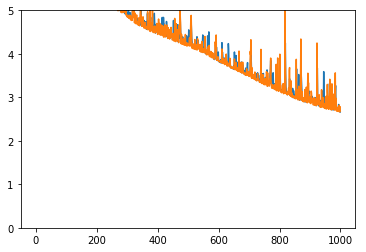

In [7]:
plt.ylim(0, 5)
plt.plot(range(len(history.history['loss'])), history.history['loss'], history.history['val_loss'])

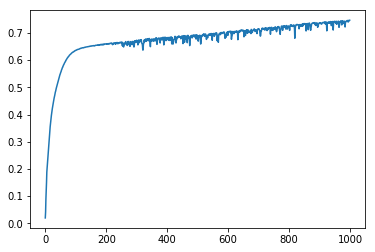

In [8]:
plt.plot(range(len(history.history['overlap_metric'])),history.history['overlap_metric'])

In [9]:
print(history.history.keys()) 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_overlap_metric', 'loss', 'mean_absolute_error', 'overlap_metric'])


## Final accuracy

In [10]:
print("Mean absolute error", history.history['val_mean_absolute_error'][-1])
print("Overlap metric", history.history['val_overlap_metric'][-1])

Mean absolute error 1.2440972004726332
Overlap metric 0.7392778358617289
